# Day 21: Dictionary Review & Binary Numbers
## Dictionary examples
This function gets the bid from each player in a trick-taking card game and stores it in a dictionary

In [1]:
# player_names: list of strings, e.g., ['King','Kirlin','Kugele','Larkins','Sanders','Schwamb','Superdock']
# hands: dict of player names as keys, with a list of strings for each player, e.g., hands['King'] is ['Ace of Hearts','2 of Diamonds','3 of Clubs','King of Spades']
# n_cards: int, e.g., 4
from Game Jam Tutorial.card_game import *
from Game Jam Tutorial.game_graphics import *

def get_bids(player_names,hands,n_cards):
    bids = dict()
    for player in player_names:
        show_cards(hands,player) # shows player's cards on screen
        bids[player] = int(input("How many tricks is " + player + " bidding? "))
        while player == player_names[-1] and sum(bids.values()) == n_cards:
            #invalid_bid = n_cards - sum(list(bids.values())[:-1])
            invalid_bid = bids[player] # this line and the next one both work
            bids[player] = int(input("Invalid bid! You cannot bid "+str(invalid_bid)+". Try again: "))
    show_bids(sum(bids.values()),n_cards) # shows what all players bid on the screen

    return bids

#get_bids(['King','Kirlin','Kugele','Larkins','Sanders','Schwamb','Superdock'],)

This function is a (very) simplified version of a function from my research which initializes a model of the brain with random parameters! Later those parameters are overwritten with values fitted to an individual's EEG data.

In [9]:
import random

def create_synth_MINDy(nChan, nPop):
    cols = nChan * nPop
    rows = cols
    W = [[0]*cols]*rows
    for i in range(rows):
        for j in range(nChan):
            W[i][j] = abs(random.gauss())
    for i in range(nChan):
        W[i][nChan+i] = -abs(random.gauss())
        W[nChan+i][nChan+i] = -abs(random.gauss())
    

    # Generate other parameters
    C = 0
    V = 0
    DE = [1]*nChan
    DI = [1]*nChan
    for i in range(nChan):
        DE[i] = max(0.5, min(0.9, 0.65 + random.gauss()/50))
        DI[i] = max(0.5, min(0.9, 0.8 + random.gauss()/50))
    SE = [2.5] * nChan
    SI = [1] * nChan
    # Combine excitatory & inhibitory portions
    D = DE + DI
    S = SE + SI

    # Compile into dictionary
    model = dict()
    model['W'] = W
    model['D'] = D
    model['C'] = C
    model['S'] = S
    model['V'] = V

    return model

model = create_synth_MINDy(4,2)
print(model)

{'W': [[0.7040944580204389, 0.30304422234171075, 1.0573791662148944, 0.7683857127231233, -0.5615347818205808, -1.0527422788759804, -2.7266601813482496, -0.7301508149665097], [0.7040944580204389, 0.30304422234171075, 1.0573791662148944, 0.7683857127231233, -0.5615347818205808, -1.0527422788759804, -2.7266601813482496, -0.7301508149665097], [0.7040944580204389, 0.30304422234171075, 1.0573791662148944, 0.7683857127231233, -0.5615347818205808, -1.0527422788759804, -2.7266601813482496, -0.7301508149665097], [0.7040944580204389, 0.30304422234171075, 1.0573791662148944, 0.7683857127231233, -0.5615347818205808, -1.0527422788759804, -2.7266601813482496, -0.7301508149665097], [0.7040944580204389, 0.30304422234171075, 1.0573791662148944, 0.7683857127231233, -0.5615347818205808, -1.0527422788759804, -2.7266601813482496, -0.7301508149665097], [0.7040944580204389, 0.30304422234171075, 1.0573791662148944, 0.7683857127231233, -0.5615347818205808, -1.0527422788759804, -2.7266601813482496, -0.7301508149

# Binary Numbers

Back at the beginning of the semester, we talked a little bit about how all data in a computer is stored in sequences of 0s and 1s. We're going to spend some time today learning about binary numbers, since they are the underlying data representation.

__Byte:__ just enough memory to store letter or small number 
* Divided into eight bits 
* __Bit:__ electrical component that can hold positive or negative charge, like on/off switch 
* The on/off pattern of bits in a byte represents data stored in the byte 

### Binary Numbers
A Binary Number is made up of only 0s and 1s.
* Example: 110100 - There are no 2, 3, 4, 5, 6, 7, 8 or 9 in binary.
* "There are 10 types of people in this world: those who understand binary and those who don't" - Unknown
* "Binary is as easy as 1, 10, 11."

### How do we count in binary?
| Binary |                             |
| ------ | --------------------------- |
|      0 | We start at 0               |
|      1 | Then 1                      |
|    ??? | But then there is no symbol for 2...what do we do? |


### How do we count in decimal?
| Decimal |                                   |
| ------- | --------------------------------- |
|       0 | We start at 0                     |
|     ... | Count 1, 2, 3, 4, 5, 6, 7, 8      |
|       9 | This is the last digit in decimal |
|      10 | So we start back at 0 again but add 1 on the left |


### Applying to Binary
|      | Binary |                     |
| ---- | ------ | ------------------- |
|      |      0 | We start at 0       |
|    * |      1 | Then 1              |
|   ** |     10 | Now we start back at 0 and add 1 on the left |
|  *** |     11 | 1 more              |
| **** |    100 | Start back at 0 and add 1 to the number on the left...but that number is already at 1 so it just goes back to 0...and 1 is added to the next *position* on the left |

|     Decimal:    |     0    |     1    |      2    |      3    |      4     |      5     |      6     |      7     |       8     |       9     |      10     |      11     |      12     |      13     |      14     |      15     |
|:---------------:|:--------:|:--------:|:---------:|:---------:|:----------:|:----------:|:----------:|:----------:|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|
|      Binary:    |     0    |     1    |     10    |     11    |     100    |     101    |     110    |     111    |     1000    |     1001    |     1010    |     1011    |     1100    |     1101    |     1110    |     1111    |


|     Decimal:    |       20     |       25     |       30     |       40      |       50      |       100      |        200      |        500       |
|:---------------:|:------------:|:------------:|:------------:|:-------------:|:-------------:|:--------------:|:---------------:|:----------------:|
|      Binary:    |     10100    |     11001    |     11110    |     101000    |     110010    |     1100100    |     11001000    |     111110100 

## Converting Binary to Decimal

In the decimal system, each position in the number represents the value * 10^position.
* Example: $193 = 1 * 10^2 + 9 * 10^1 + 3 * 10^0$

This is the same in binary, except since is a base-2 system, each position is 2^position.
* $10111= 1 * 2^4 + 0 * 2^3 + 1 * 2^2 + 1 * 2^1  + 1 * 2^0$
* $101001 = 1 * 2^5 + 0 * 2^4 + 1 * 2^3 + 0 * 2^2 + 0 * 2^1 + 1 * 2^0$

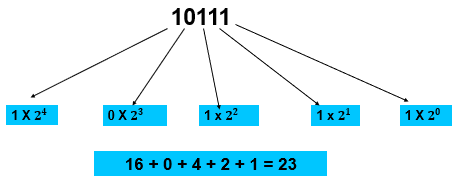

Since it can be ambiguous which base system a number is representing, for example if I say 10 do I mean ten, or do I mean two in binary, we can decscribe a number by it's base. The notation for this is $value_{base}$.

## Converting Decimal into Binary
* 47/2 = 23 rem 1
* 23/2 = 11 rem 1
* 5/2 = 2 rem 1
* 2/2 = 1 rem 0
* 1/2 = 0 rem 1

Then write them from left to right going from bottom to top: 101111

## Practice
* Convert $39_{10}$ into binary
* Convert $36_{10}$ into binary2
* Convert $10101_{2}$ into decimal
* Convert $11111_{2}$ into decimal

In [8]:
# join examples
lst = ['Hello', 'World', 'my', 'name', 'is', 'Addison']
string = " ".join(lst)
print(lst)
print(string)
for item in lst:
    print(item,end=" ")

['Hello', 'World', 'my', 'name', 'is', 'Addison']
Hello World my name is Addison
Hello World my name is Addison 